In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

#libraries for analysis, visualization, and algorithm


In [2]:
#created a variable to load the data
df = pd.read_csv("C:/Users/paper/Desktop/mall_customers.csv")

In [3]:
#this shows you the first five rows of data
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate analysis


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


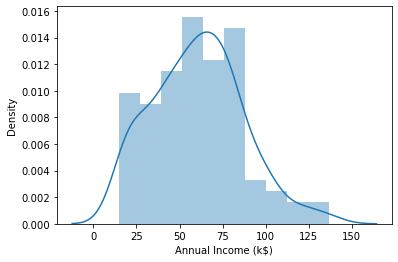

In [7]:
#The distplot represents the univariate distribution of data i.e. data distribution of a 
#variable against the density distribution.
sns.distplot(df['Annual Income (k$)']);

In [8]:
#hwow to reteive column names
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

# this for loop creates a new graph per each column
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

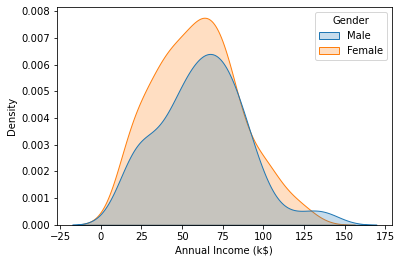

In [12]:
#KDE represents the data using a continuous probability density curve in one or more dimensions.
#hue determines which column will be isoloated and colored
sns.kdeplot(df['Annual Income (k$)'], shade=True,hue=df['Gender']);

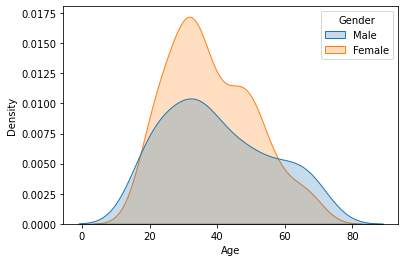

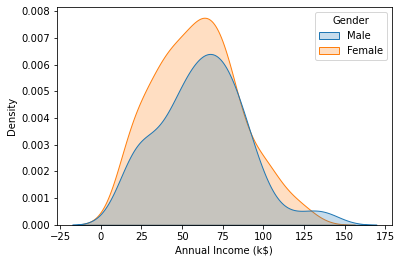

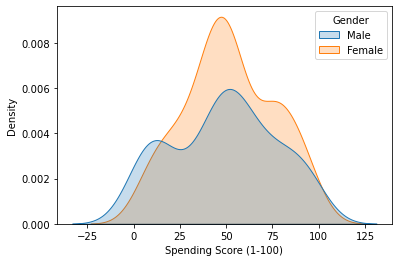

In [13]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(df[i], shade=True,hue=df['Gender']);

## columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x='Gender', y=df[i]);

In [16]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis

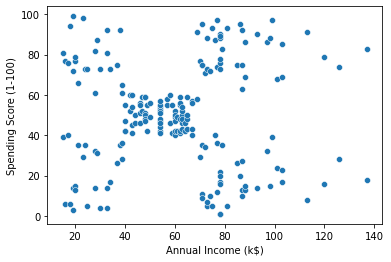

In [19]:
#scatter plots are great for displaying clusters in data
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)');

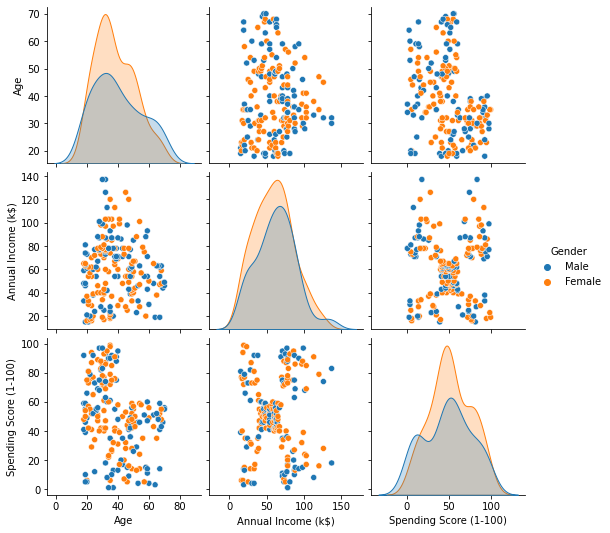

In [23]:
#Pair plots are used to find the best set of graphs/charts that show the relationship between two vairables
#df = df.drop('CustomerID', axis=1)
sns.pairplot(df, hue='Gender')

In [26]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [27]:
#find correlation
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<AxesSubplot:>

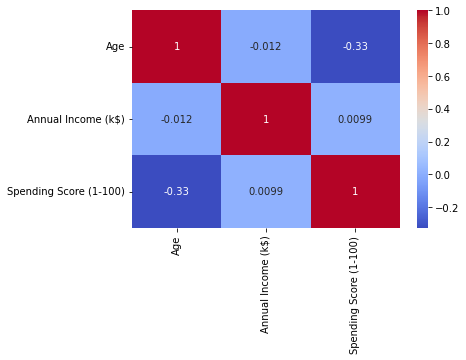

In [29]:
#How to create a customized heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Clusteribg - Univariate, Bivariate, Multivariate

In [34]:
#Creating the Algorithm by creating the variable first
clustering1 = KMeans(n_clusters=3)

In [35]:
#Initiate the variable
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [36]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [37]:
df['Income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [39]:
#Summary Statisitcs
df['Income Cluster'].value_counts()

0    90
1    74
2    36
Name: Income Cluster, dtype: int64

In [41]:
clustering1.inertia_

23517.33093093092

In [42]:
#this for loops helps us determine the right number of clusters found in the dataset
inertia_scores = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [43]:
inertia_scores

[137277.2800000002,
 48660.88888888887,
 23528.152173913048,
 13278.112713472474,
 8493.229304029299,
 5050.904761904766,
 3949.275613275612,
 2822.4996947496957,
 2258.110041592395,
 1859.8078940667165]

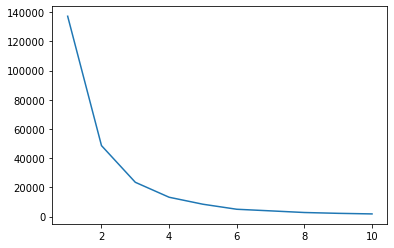

In [44]:
#elbow method is a graphical representation of finding the optimal 'K' in a K-means clustering.
#this graph shows the elbow forming at 3
plt.plot(range(1,11), inertia_scores);

In [46]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.722222,67.088889,50.000000
1,39.500000,33.486486,50.229730
2,37.833333,99.888889,50.638889


In [ ]:
#Bivariate Clustering

In [54]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,1
2,Female,20,16,6,1,4
3,Female,23,16,77,1,1
4,Female,31,17,40,1,4


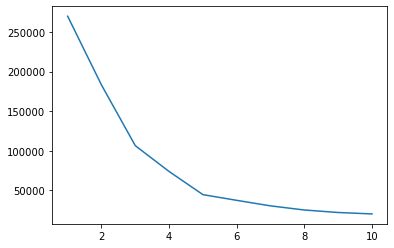

In [55]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

In [61]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

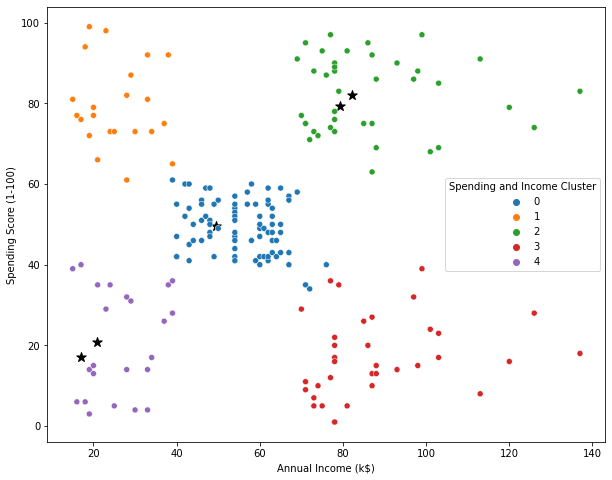

In [80]:
#how to display centers of clusters
plt.figure(figsize=(10,8))
plt.scatter(x=centers['y'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending and Income Cluster', palette='tab10');
plt.savefig('clustering_bivariate.png')

In [66]:
#determine percent of each cluster
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.590909,0.409091
2,0.538462,0.461538
3,0.457143,0.542857
4,0.608696,0.391304


In [67]:
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,25.272727,25.727273,79.363636
2,32.692308,86.538462,82.128205
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


In [68]:
#Multivariate Clustering
#Scale Clustering Data
from sklearn.preprocessing import StandardScaler


In [69]:
scale = StandardScaler()

In [70]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,1
2,Female,20,16,6,1,4
3,Female,23,16,77,1,1
4,Female,31,17,40,1,4


In [72]:
#Convert gender to numerical representation
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,1,4,1
1,21,15,81,1,1,1
2,20,16,6,1,4,0
3,23,16,77,1,1,0
4,31,17,40,1,4,0


In [73]:
dff.columns


Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [76]:
dff= dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)',  'Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [77]:
#makes it easy for the model to learn and understand the problem
dff = scale.fit_transform(dff)

In [78]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


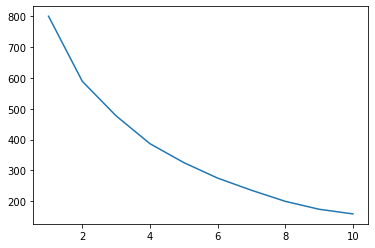

In [79]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [81]:
df.to_csv('Clustering.csv')